<a href="https://colab.research.google.com/github/booorayan/naive_bayes_knn/blob/master/Categorizing_Mail_As_Spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying Mail As Spam or Not 

## Defining the Question

## Importing Required Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [0]:
# enabling mulitple display in the same cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


## Loading the Dataset

In [130]:
spam = pd.read_csv('spambase.csv', names=range(1,59))
spam.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [131]:
# previewing the first five observations in the dataset
print('\033[1m  First Five Observations:\033[0m \n')
spam.head()

# previewing the last five observations 
print('\n\n\n\033[1m  Last Five Observations:\033[0m \n' )
spam.tail()

  First Five Observations: 



,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1





  Last Five Observations: 



,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [132]:
# checking the number of rows and columns and total no. of observations in the dataframe
print('No. of rows:', spam.shape[0])
print('No. of columns:', spam.shape[1])
print('Total no. of observations:', spam.size)

No. of rows: 4601
No. of columns: 58
Total no. of observations: 266858


In [133]:
# checking if the columns have the correct datatypes
spam.dtypes

1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55    float64
56      int64
57      int64
58      int64
dtype: object

In [134]:
# checking the no. of non-null values in the datframe
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
1     4601 non-null float64
2     4601 non-null float64
3     4601 non-null float64
4     4601 non-null float64
5     4601 non-null float64
6     4601 non-null float64
7     4601 non-null float64
8     4601 non-null float64
9     4601 non-null float64
10    4601 non-null float64
11    4601 non-null float64
12    4601 non-null float64
13    4601 non-null float64
14    4601 non-null float64
15    4601 non-null float64
16    4601 non-null float64
17    4601 non-null float64
18    4601 non-null float64
19    4601 non-null float64
20    4601 non-null float64
21    4601 non-null float64
22    4601 non-null float64
23    4601 non-null float64
24    4601 non-null float64
25    4601 non-null float64
26    4601 non-null float64
27    4601 non-null float64
28    4601 non-null float64
29    4601 non-null float64
30    4601 non-null float64
31    4601 non-null float64
32    4601 non-null float

## Exploratory Data Analysis

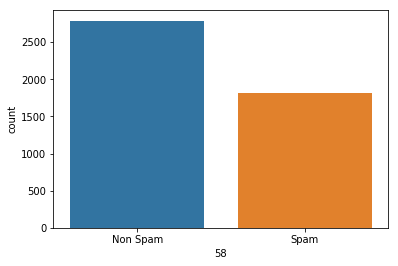

In [135]:
# mapl = {0: 'Not Spam', 1: 'Spam'}
sns.countplot(x=58, data=spam)
plt.xticks(spam[58].unique(), labels=['Spam', 'Non Spam'])
plt.show();

There is a slight imbalance in the data; there are more non spam emails than spam emails

## Modelling

According to the description of the dataset, the first 48 columns have information on the percentage of the word count. These columns will serve as the features for our model.

The last column will be the target variable as it describes whether an email is spam or not.

In the target column, 0 indicates not spam and 1 indicates email is spam)

In [136]:
# specifying our features and target variable
features = spam.iloc[:,:48]
target = spam.iloc[:,-1]


# splitting the features and target variables into training and test sets with a test size of 0.2/20% of dataframe
feat_train, feat_test, targ_train, targ_test = train_test_split(features, target, test_size=0.2, random_state=30)

print('feat train shape:', feat_train.shape)
print('targ train shape:', targ_train.shape)
print('feat test shape:', feat_test.shape)
print('targ test shape:', targ_test.shape)

feat train shape: (3680, 48)
targ train shape: (3680,)
feat test shape: (921, 48)
targ test shape: (921,)


In [137]:
features.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0


In [138]:
gauss = GaussianNB()
gm = gauss.fit(feat_train, targ_train)

g_pred = gm.predict(feat_test)
print('\n' + '===='*20)
metrics.accuracy_score(targ_test, g_pred) * 100
print('\n' + '===='*20)
print('Classification Report:\n', metrics.classification_report(targ_test, g_pred))
print('\n' + '===='*20)
print('Confusion Matrix:\n', metrics.confusion_matrix(targ_test, g_pred))
print('\n' + '===='*20)

80.13029315960912


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.71      0.82       578
           1       0.66      0.96      0.78       343

    accuracy                           0.80       921
   macro avg       0.81      0.83      0.80       921
weighted avg       0.85      0.80      0.80       921


Confusion Matrix:
 [[408 170]
 [ 13 330]]



In [0]:
# Optimizing Model By Removing Highly Correlated Features

### Optimizing Model By Removing Highly Correlated Features

In [140]:
# Create correlation matrix
corr_matrix = features.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

[34]

In [141]:
# Dropping features that show high correlation 
spam_cl = features.drop(features[to_drop], axis=1)
spam_cl.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,35,36,37,38,39,40,41,42,43,44,45,46,47,48
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0


Column 34 was dropped as it had a high correlation with a different column in the dataset

In [142]:
# specifying our features and target variable
feat = spam_cl.iloc[:,:47]
targ = spam.iloc[:,57]


# splitting the features and target variables into training and test sets with a test size of 0.2/20% of dataframe
featt_train, featt_test, targg_train, targg_test = train_test_split(feat, targ, test_size=0.2, random_state=30)

print('featt train shape:', featt_train.shape)
print('targg train shape:', targg_train.shape)
print('featt test shape:', featt_test.shape)
print('targg test shape:', targg_test.shape)
# feat.head()

featt train shape: (3680, 47)
targg train shape: (3680,)
featt test shape: (921, 47)
targg test shape: (921,)


In [173]:
gaussian = GaussianNB()

gaussian.fit(featt_train, targg_train)

gn_pred = gaussian.predict(featt_test)
print('\n' + '===='*20)
metrics.accuracy_score(targg_test, gn_pred) * 100
print('\n' + '===='*20)
print('Classification Report:\n', metrics.classification_report(targg_test, gn_pred))
print('\n' + '===='*20)
print('Confusion Matrix:\n', metrics.confusion_matrix(targg_test, gn_pred))
print('\n' + '===='*20)

GaussianNB(priors=None, var_smoothing=1e-09)

80.67318132464713


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.71      0.82       578
           1       0.67      0.96      0.79       343

    accuracy                           0.81       921
   macro avg       0.82      0.84      0.81       921
weighted avg       0.86      0.81      0.81       921


Confusion Matrix:
 [[413 165]
 [ 13 330]]



In [144]:
# using the multinomial model to make predictions
multinm = MultinomialNB()

# training the multinomial model with data
multinm.fit(featt_train, targg_train)

mnm_pred = multinm.predict(featt_test)
print('\n' + '===='*20)
metrics.accuracy_score(targg_test, mnm_pred) * 100
print('\n' + '===='*20)
print('Classification Report:\n', metrics.classification_report(targg_test, mnm_pred))
print('\n' + '===='*20)
print('Confusion Matrix:\n', metrics.confusion_matrix(targg_test, mnm_pred))
print('\n' + '===='*20)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

85.34201954397395


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.81      0.87       578
           1       0.74      0.93      0.83       343

    accuracy                           0.85       921
   macro avg       0.85      0.87      0.85       921
weighted avg       0.87      0.85      0.86       921


Confusion Matrix:
 [[466 112]
 [ 23 320]]



In [178]:
# specifying our features and target variable
ffeat = spam_cl.iloc[:,:47]
ttarg = spam.iloc[:,57]


# splitting the features and target variables into training and test sets with a test size of 0.3/30% of dataframe
ffeatt_train, ffeatt_test, ttargg_train, ttargg_test = train_test_split(ffeat, ttarg, test_size=0.3, random_state=30)

print('featt train shape:', ffeatt_train.shape)
print('targg train shape:', targg_train.shape)
print('featt test shape:', ffeatt_test.shape)
print('targg test shape:', ttargg_test.shape)
# feat.head()

featt train shape: (3220, 47)
targg train shape: (3680,)
featt test shape: (1381, 47)
targg test shape: (1381,)


In [174]:
gssian = GaussianNB()

gssian.fit(ffeatt_train, ttargg_train)

gasn_pred = gssian.predict(featt_test)
print('\n' + '===='*20)
metrics.accuracy_score(targg_test, gasn_pred) * 100
print('\n' + '===='*20)
print('Classification Report:\n', metrics.classification_report(targg_test, gasn_pred))
print('\n' + '===='*20)
print('Confusion Matrix:\n', metrics.confusion_matrix(targg_test, gasn_pred))
print('\n' + '===='*20)

GaussianNB(priors=None, var_smoothing=1e-09)

79.58740499457112


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.70      0.81       578
           1       0.65      0.96      0.78       343

    accuracy                           0.80       921
   macro avg       0.81      0.83      0.79       921
weighted avg       0.85      0.80      0.80       921


Confusion Matrix:
 [[405 173]
 [ 15 328]]



In [175]:
# using the multinomial model to make predictions
multinomi = MultinomialNB()

# training the multinomial model with data
multinomi.fit(ffeatt_train, ttargg_train)

munom_pred = multinomi.predict(ffeatt_test)
print('\n' + '===='*20)
metrics.accuracy_score(ttargg_test, munom_pred) * 100
print('\n' + '===='*20)
print('Classification Report:\n', metrics.classification_report(ttargg_test, munom_pred))
print('\n' + '===='*20)
print('Confusion Matrix:\n', metrics.confusion_matrix(ttargg_test, munom_pred))
print('\n' + '===='*20)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

85.15568428674874


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.80      0.87       863
           1       0.74      0.94      0.83       518

    accuracy                           0.85      1381
   macro avg       0.85      0.87      0.85      1381
weighted avg       0.87      0.85      0.85      1381


Confusion Matrix:
 [[690 173]
 [ 32 486]]



In [189]:
# specifying our features and target variable
ffeatt = spam_cl.iloc[:,:47]
ttargg = spam.iloc[:,57]


# splitting the features and target variables into training and test sets with a test size of 0.4/40% of dataframe
feeatt_train, feeatt_test, taargg_train, taargg_test = train_test_split(ffeatt, ttargg, test_size=0.4, random_state=30)

print('feeatt train shape:', feeatt_train.shape)
print('taargg train shape:', taargg_train.shape)
print('feeatt test shape:', feeatt_test.shape)
print('taargg test shape:', taargg_test.shape)
# feat.head()

feeatt train shape: (2760, 47)
taargg train shape: (2760,)
feeatt test shape: (1841, 47)
taargg test shape: (1841,)


In [183]:
gosian = GaussianNB()

gosian.fit(feeatt_train, taargg_train)

gosn_pred = gosian.predict(feeatt_test)
print('\n' + '===='*20)
metrics.accuracy_score(taargg_test, gosn_pred) * 100
print('\n' + '===='*20)
print('Classification Report:\n', metrics.classification_report(taargg_test, gosn_pred))
print('\n' + '===='*20)
print('Confusion Matrix:\n', metrics.confusion_matrix(taargg_test, gosn_pred))
print('\n' + '===='*20)

GaussianNB(priors=None, var_smoothing=1e-09)

80.28245518739816


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.70      0.81      1136
           1       0.67      0.96      0.79       705

    accuracy                           0.80      1841
   macro avg       0.82      0.83      0.80      1841
weighted avg       0.85      0.80      0.81      1841


Confusion Matrix:
 [[799 337]
 [ 26 679]]



In [185]:
# using the multinomial model to make predictions
multinomio = MultinomialNB()

# training the multinomial model with data
multinomio.fit(feeatt_train, taargg_train)

munomi_pred = multinomio.predict(feeatt_test)
print('\n' + '===='*20)
metrics.accuracy_score(taargg_test, munomi_pred) * 100
print('\n' + '===='*20)
print('Classification Report:\n', metrics.classification_report(taargg_test, munomi_pred))
print('\n' + '===='*20)
print('Confusion Matrix:\n', metrics.confusion_matrix(taargg_test, munomi_pred))
print('\n' + '===='*20)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

85.7686040195546


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.81      0.87      1136
           1       0.75      0.94      0.84       705

    accuracy                           0.86      1841
   macro avg       0.85      0.87      0.85      1841
weighted avg       0.88      0.86      0.86      1841


Confusion Matrix:
 [[915 221]
 [ 41 664]]



We get the best accuracy accuracy with the multinomial NB when the test size is 0.4 (i.e. ratio of training to test set is 60:40)

### Optimizing Model by Upsampling and Downsampling to Remove Imbalance

In [145]:
# Indicies of each class' observations
i_class0 = np.where(targ == 0)[0]
i_class1 = np.where(targ == 1)[0]

# Number of observations in each class
n_class0 = len(i_class0)
n_class1 = len(i_class1)

n_class0
print('\n' + '===='*10)
n_class1 

2788

1813

Output reveals class1 is shorter than class 0. 

We will proceed to upscale class 1 and make it equal to class 0

In [154]:
# For every observation in class 1, randomly sample from class 0 with replacement
i_class1_upsampled = np.random.choice(i_class1, size=2300, replace=True)

i_class0_downsampled = np.random.choice(i_class0, size=2301, replace=False)


# Join together class 1's upsampled target vector with class 0's target vector
concol = np.concatenate((targ[i_class1_upsampled], targ[i_class0_downsampled]))
len(concol)

4601

In [155]:
spam_df = spam.copy()
spam_df['spam'] = pd.Series(concol)
spam_df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1,1


In [156]:
spam_df.drop( axis=1, columns=58, inplace=True)
spam_df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


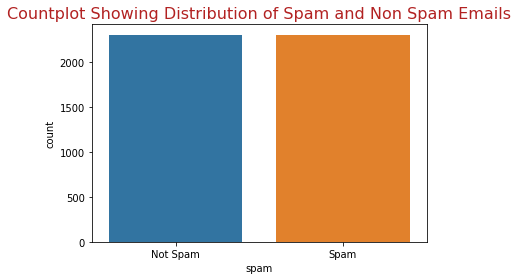

In [170]:
# plotting a countplot to show the value counts of entries in the spam column
sns.countplot(spam_df.spam)
plt.title('Countplot Showing Number of Spam and Non Spam Emails', fontsize=16, color='firebrick')
plt.xticks(spam_df.spam.unique(), labels=['Spam', 'Not Spam'])
plt.show();

In [190]:
# defining our independent variables
fichas = spam_df.iloc[:,:48]

# dropping column 34 to minimize correlation of variables 
fichas.drop(columns=34, axis=1, inplace=True)

# defining the target variable
lebo = spam_df.iloc[:,-1]


# splitting the data into training and test sets
fichas_train, fichas_test, lebo_train, lebo_test = train_test_split(fichas, lebo, test_size=.4, random_state=30)

print('fichas train shape:', fichas_train.shape)
print('lebo train shape:', lebo_train.shape)
print('fichas test shape:', fichas_test.shape)
print('lebo test shape:', lebo_test.shape)

fichas train shape: (2760, 47)
lebo train shape: (2760,)
fichas test shape: (1841, 47)
lebo test shape: (1841,)


In [191]:
# using the multinomial model to make predictions
multinom = MultinomialNB()

# training the multinomial model with data
multinom.fit(fichas_train, lebo_train)

mnom_pred = multinom.predict(fichas_test)
print('\n' + '===='*20)
metrics.accuracy_score(lebo_test, mnom_pred) * 100
print('\n' + '===='*20)
print('Classification Report:\n', metrics.classification_report(lebo_test, mnom_pred))
print('\n' + '===='*20)
print('Confusion Matrix:\n', metrics.confusion_matrix(lebo_test, mnom_pred))
print('\n' + '===='*20)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

74.09016838674634


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.66      0.72       937
           1       0.70      0.82      0.76       904

    accuracy                           0.74      1841
   macro avg       0.75      0.74      0.74      1841
weighted avg       0.75      0.74      0.74      1841


Confusion Matrix:
 [[623 314]
 [163 741]]



In [192]:
gsian = GaussianNB()

gsian.fit(fichas_train, lebo_train)

gsn_pred = gsian.predict(fichas_test)
print('\n' + '===='*20)
metrics.accuracy_score(lebo_test, gsn_pred) * 100
print('\n' + '===='*20)
print('Classification Report:\n', metrics.classification_report(lebo_test, gsn_pred))
print('\n' + '===='*20)
print('Confusion Matrix:\n', metrics.confusion_matrix(lebo_test, gsn_pred))
print('\n' + '===='*20)

GaussianNB(priors=None, var_smoothing=1e-09)

70.61379684953829


Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.59      0.67       937
           1       0.66      0.83      0.73       904

    accuracy                           0.71      1841
   macro avg       0.72      0.71      0.70      1841
weighted avg       0.72      0.71      0.70      1841


Confusion Matrix:
 [[550 387]
 [154 750]]



When we reduce correlated features to improve model performace,the accuracy of the model increases to 85% for multinomial model and 80.67% for the gaussian naives bayes classifier

When we balance the values in the target variable , the accuracy of the model decreases to 74% for the multinomial naives bayes classifier and 70% for the gaussian naives bayes classifier.


## Challenging the Solution

In [193]:
# using bernoulli naives bayes

bern = BernoulliNB(binarize=0.25)

bern.fit(feeatt_train, taargg_train)

bern_pred = bern.predict(feeatt_test)
print('\n' + '===='*20)
metrics.accuracy_score(taargg_test, bern_pred) * 100
print('\n' + '===='*20)
print('Classification Report:\n', metrics.classification_report(taargg_test, bern_pred))
print('\n' + '===='*20)
print('Confusion Matrix:\n', metrics.confusion_matrix(taargg_test, bern_pred))
print('\n' + '===='*20)




BernoulliNB(alpha=1.0, binarize=0.25, class_prior=None, fit_prior=True)

88.91906572514937


Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91      1136
           1       0.87      0.84      0.85       705

    accuracy                           0.89      1841
   macro avg       0.88      0.88      0.88      1841
weighted avg       0.89      0.89      0.89      1841


Confusion Matrix:
 [[1045   91]
 [ 113  592]]



Using the bernoulli naives bayes classifier, the prediction accuracy increases to 88.92%.

Based on accuracy score, the bernoulli naives bayes classifier is the best model for predicting whether an email is spam or not.

## Conclusion

One can imporove the project by opting to use the bernoulli naives bayes classifier instead of the multinomial or gaussian NB classifiers.

When we balance the target variable, the accuracy of the prediction models decrease by apprximately 10%

When we remove features with a correlation greater than 0.95, the accuracy of the models (i.e. gaussianNB and multinomialNB) increase slightly